# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [13]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

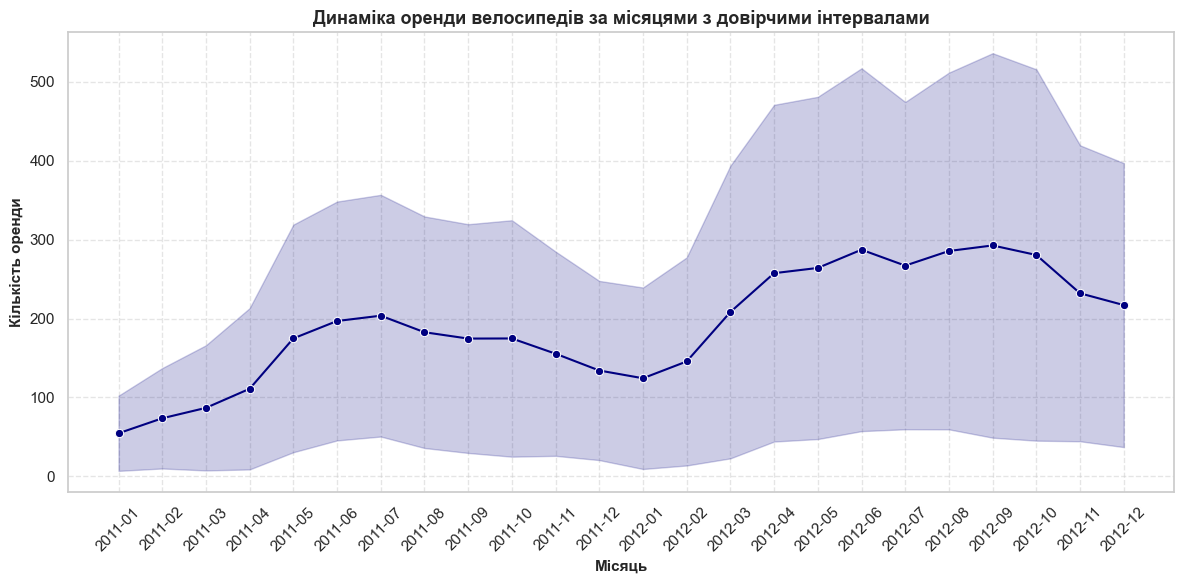

In [15]:
# Створення колонки для місяців
df['month_year'] = df.index.to_period('M').astype(str)

# Установлюємо тему
sns.set_theme(style="whitegrid")

# Будуємо графік
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='month_year',
    y='count',
    errorbar='sd',       
    marker='o',
    color='navy'
)

# Оформлення
plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами', fontsize=13, weight='bold')
plt.xlabel('Місяць', fontsize=11, weight='bold')
plt.ylabel('Кількість оренди', fontsize=11, weight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Відповіді на питання:**
Найбільша невизначеність у даних там, де ширина довірчого інтервалу найбільша. Це теплі місяці - травень, червень, липень, серпень 2012р. Це можна пояснити тим, що під час хорошої погоди влітку оренд багато, а коли погода погана (дощова) - мало. Саме у цей період к-ть оренд могла значно коливатись.Тоді як у зимові місяць навпаки - смуга довірчого інтервалу вужча, тобто, к-ть оренд була стабільною.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

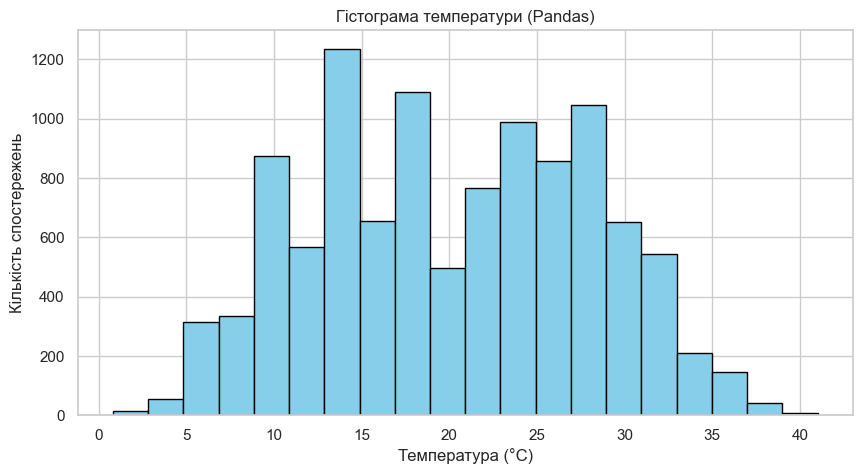

In [16]:
# Побудова гістограми з Pandas
df['temp'].plot.hist(
    bins=20,
    color='skyblue',
    edgecolor='black',
    figsize=(10, 5),
    title='Гістограма температури (Pandas)'
)

plt.xlabel('Температура (°C)')
plt.ylabel('Кількість спостережень')
plt.grid(True)
plt.show()


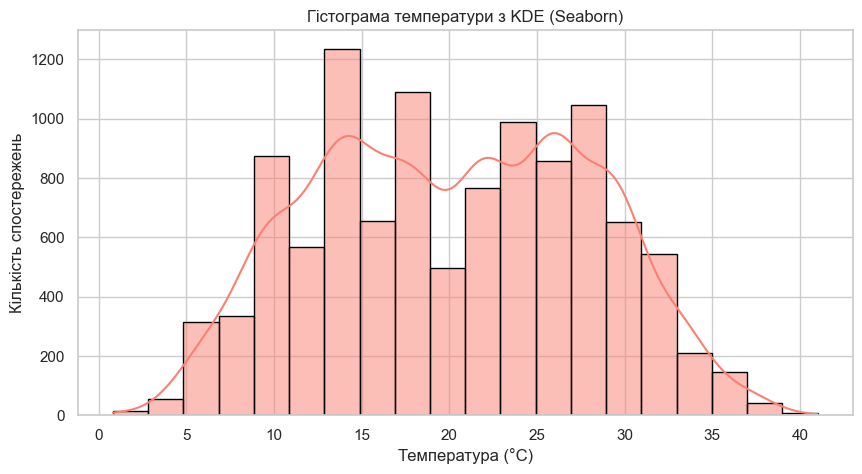

In [17]:
# Побудова гістограми з Seaborn
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df,
    x='temp',
    bins=20,
    kde=True,
    color='salmon',
    edgecolor='black'
)

plt.title('Гістограма температури з KDE (Seaborn)')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість спостережень')
plt.grid(True)
plt.show()

**Відповіді на питання:**
1. Графік, побудований з Pandas простий, має стандартні кольори, немає KDE-кривої. Графік, побудований з Seaborn яскравіший, має більше параметрів. які можна налаштувати і має KDE-криву.
2. KDE-крива, оцінка щільності ймовірності. Це плавна крива, яка показує, як розподілені дані. На відміну від "сходинок" гістограми, KDE не групує значення у відсіки, а натомість оцінює, де значення зосереджені тобто, в яких діапазонах найбільше спостережень.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

In [29]:
# Створимо словник для перекладу кодів погоди
weather_labels = {
    1: '1 – Ясно',
    2: '2 – Туман',
    3: '3 – Легкий дощ',
    4: '4 – Сильний дощ'
}

# Додамо нову колонку з описом погоди
df['weather_desc'] = df['weather'].map(weather_labels)

<Figure size 1000x600 with 0 Axes>

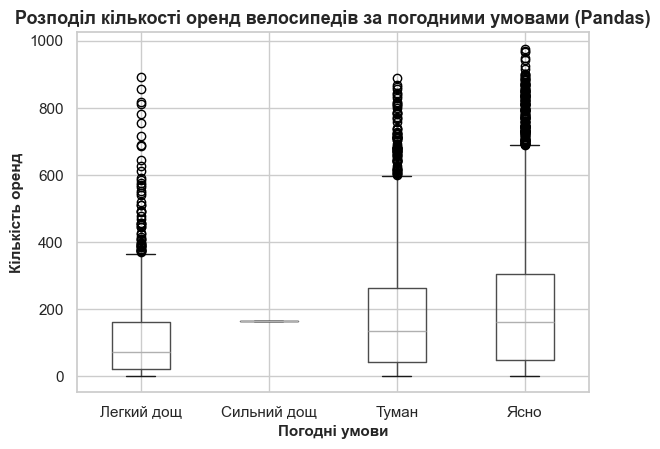

In [30]:
# Створюємо нову колонку з описом погоди
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_desc'] = df['weather'].map(weather_labels)

# Побудова box plot за допомогою Pandas
plt.figure(figsize=(10, 6))
df.boxplot(column='count', by='weather_desc', grid=True)

# Оформлення
plt.title('Розподіл кількості оренд велосипедів за погодними умовами (Pandas)', fontsize=13, weight='bold')
plt.suptitle("")  # прибирає зайвий заголовок
plt.xlabel('Погодні умови', fontsize=11, weight='bold')
plt.ylabel('Кількість оренд', fontsize=11, weight='bold')
plt.xticks(rotation=0)

plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26304\352396262.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weather_desc', y='count', palette='Set3')


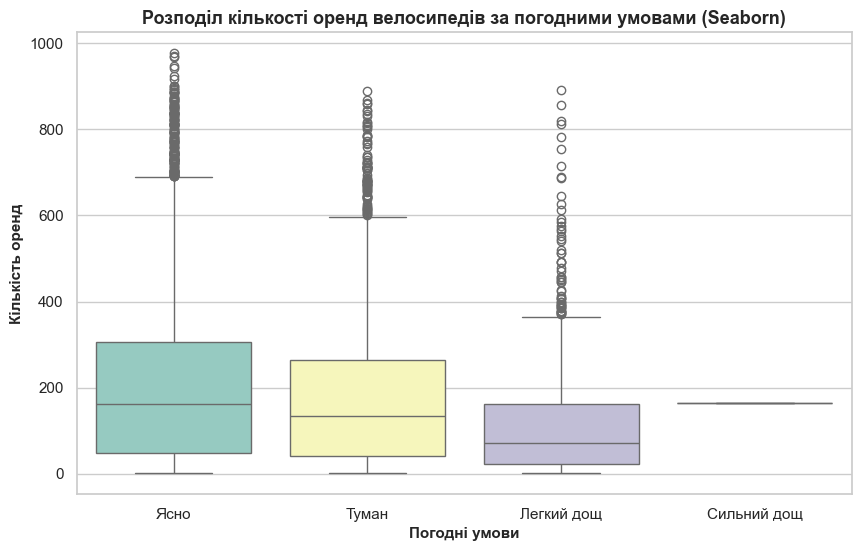

In [47]:
# Додаємо колонку з описом погоди
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_desc'] = df['weather'].map(weather_labels)

# Побудова box plot з seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weather_desc', y='count', palette='Set3')

# Оформлення
plt.title('Розподіл кількості оренд велосипедів за погодними умовами (Seaborn)', fontsize=13, weight='bold')
plt.xlabel('Погодні умови', fontsize=11, weight='bold')
plt.ylabel('Кількість оренд', fontsize=11, weight='bold')
plt.xticks(rotation=0)

plt.show()


**Відповідь напитання:**
Порівнюючи графіки, побудовані із Pandas та Seaborn бачимо, що графіки, побудовані лише із Pandas мають стандартні сірі кольори, у них стандартне оформлення (немає легенд, стилізації), які можна додатково налаштувати у Seaborn. Тоді як Seaborn автоматично гарно оформлений.
Коли потрібно швидко візуалізувати і переглянути інформацію можна використати Pandas, тоді як Seaborn для професійної візуалізації, для звітів, де важливо передати кольори і 

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


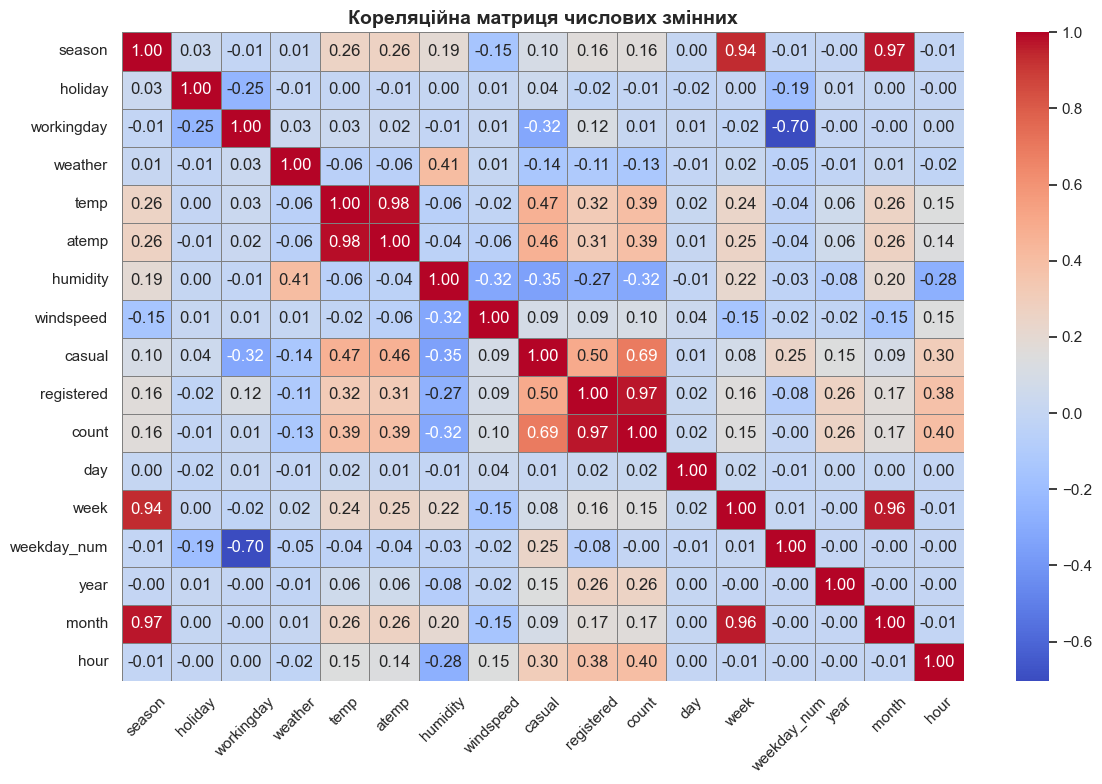

In [32]:
# Вибираємо тільки числові колонки
numeric_df = df.select_dtypes(include='number')

# Обчислюємо кореляційну матрицю
corr_matrix = numeric_df.corr()

# Побудова heatmap з анотаціями
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title('Кореляційна матриця числових змінних', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Відповіді до питання:**
1. Із count найсильніше корелюють registered, casual, temp, atemp.
2. Між temp та atemp кореляція = 0,98. Це позитивний зв'язок, майже ідеальний. atemp - це  те як відчувається погода і воно прямо залежне від того яка й є насправді температура.
3. Чітку негативну кореляцію мають:
   workingday та weekday_num: -0.70 
   workingday та casual: -0.32 
   humidity та casual: -0.35
   humidity та atemp: -0.35
   humidity та temp: -0.32
   humidity та count: -0.32
   humidity та registered: -0.27
   windspeed та humidity: -0.32

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


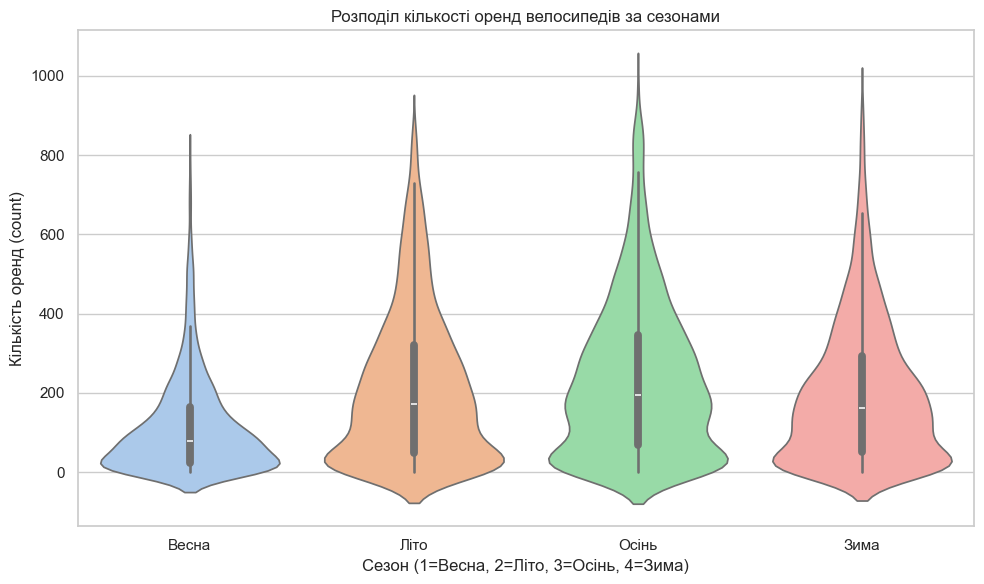

In [38]:
# Візуалізація: розподіл оренд за сезонами
plt.figure(figsize=(10, 6))
sns.violinplot(x='season', y='count', hue='season', data=df, palette='pastel', legend=False)

# Додавання підписів
plt.title('Розподіл кількості оренд велосипедів за сезонами')
plt.xlabel('Сезон (1=Весна, 2=Літо, 3=Осінь, 4=Зима)')
plt.ylabel('Кількість оренд (count)')
plt.xticks([0, 1, 2, 3], ['Весна', 'Літо', 'Осінь', 'Зима'])

plt.tight_layout()
plt.show()

**Відповіді на питання:**
1. Ширина фігури в кожній точці по вертикалі показує к-ть значень.
2. Найбільша варіабельність оренди осінюю, так як погода можу бути як досить теплою, так і дощовою (несприятливою для катання на велосипеді).
3. І violin plot, і box plot використовуються для візуалізації розподілу числових даних, але violin plot має кілька важливих переваг, 
особливо для більш глибокого аналізу. У violin plot на відміну від box plot добре видно форму розподілу, вона показує
Kernel Density Estimate (KDE) також Видно піки, "вузькі" і "широкі" місця.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

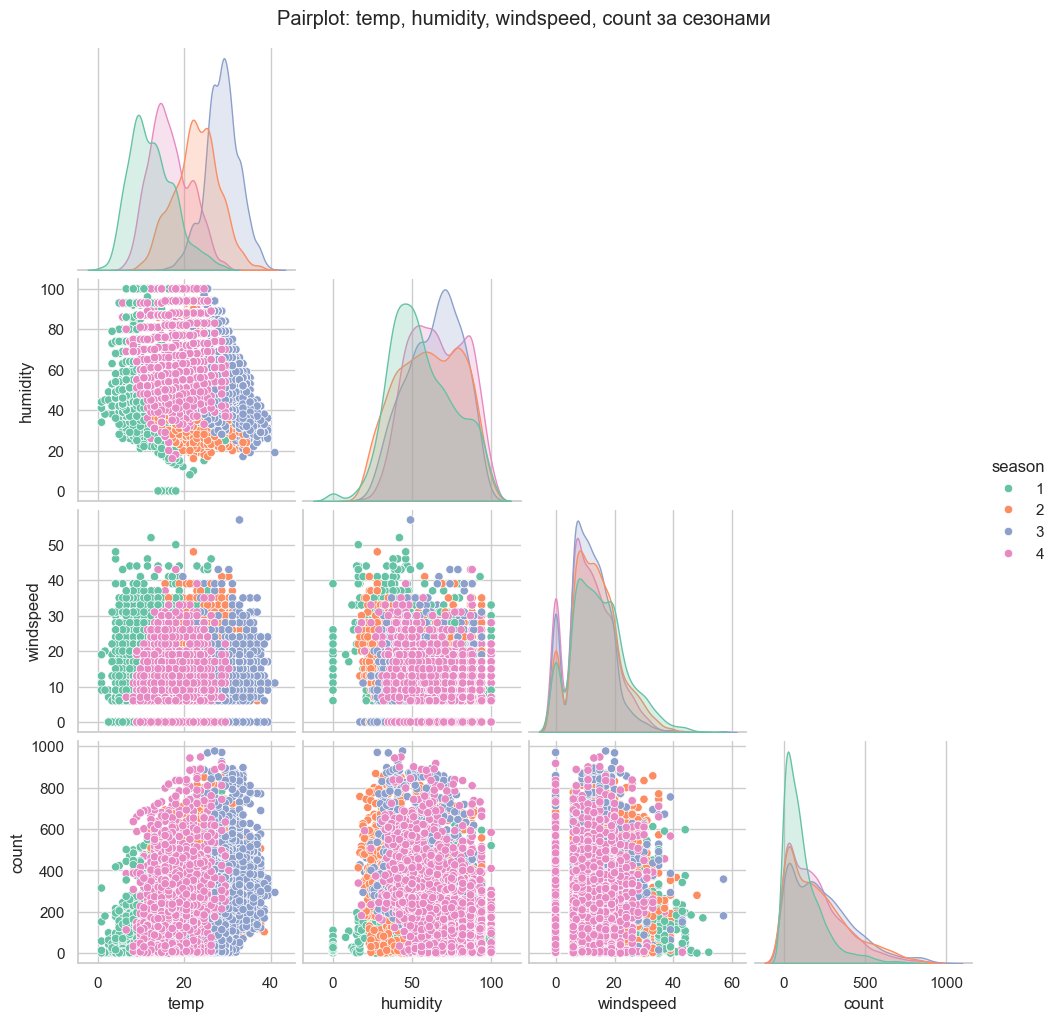

In [42]:
# Створюємо pairplot з hue за 'season'
sns.pairplot(
    df[['temp', 'humidity', 'windspeed', 'count', 'season']],
    hue='season',
    palette='Set2',
    corner=True,
    diag_kind='kde'  # для більш плавного вигляду на діагоналі
)

plt.suptitle('Pairplot: temp, humidity, windspeed, count за сезонами', y=1.02)
plt.show()

**Відповіді на питання:**

1.Найсильніший лінійний зв’язок спостерігається між змінними:
temp (температура) та count (кількість користувачів).
На діаграмі розсіювання в нижньому лівому куті видно чітку позитивну кореляцію: при зростанні температури зростає і кількість користувачів. Точки формують витягнуту діагональну смугу зліва направо вгору, що свідчить про сильний позитивний лінійний зв’язок.

2. Найсильніші сезонні відмінності спостерігаються у змінній:
temp (температура). Це добре видно на діагональному графіку розподілу температури (в першому рядку зверху), де KDE-графіки для кожного сезону чітко розділені: Влітку (сезон 2) найвища температура. Взимку (сезон 4) ж найнижча. Весна та осінь (1 та 3) мають середні значення, але все одно добре відокремлені.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

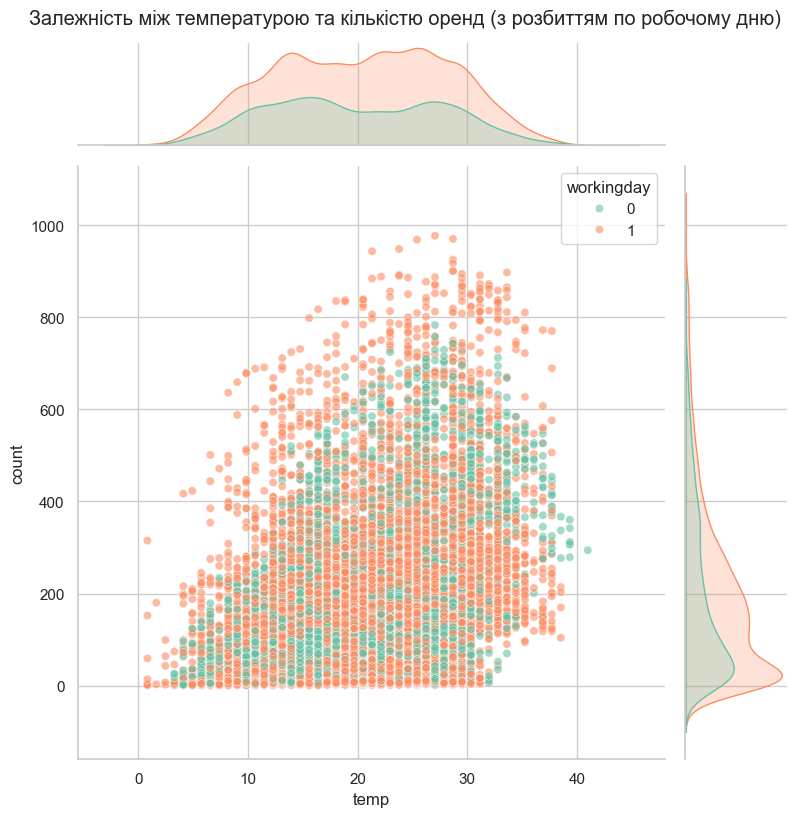

In [43]:
# Спільний графік для temp і count з розбиттям по workingday
sns.jointplot(
    data=df,
    x="temp",
    y="count",
    hue="workingday",
    kind="scatter",
    palette="Set2",
    height=8,
    alpha=0.6
)

plt.suptitle("Залежність між температурою та кількістю оренд (з розбиттям по робочому дню)", y=1.02)
plt.show()


**Відповіді на питання:**
1. Графіки по краях показують розподіли (Kernel Density Estimation, KDE) для кожної з осей:
Верхній графік показує розподіл температур окремо для робочих і неробочих днів.
Правий графік показує розподіл кількості оренд (count) для робочих і неробочих днів.
Ці KDE-графіки допомагають побачити, які значення частіші для кожної групи.
2. У робочі дні (помаранчеві точки) оренди більш рівномірно розподілені по всьому діапазону температур і частіше мають високі значення count (до 1000).
У неробочі дні (зелені точки) теж є високі значення оренд, але загалом вони зміщені до нижчих значень count.
Температурні уподобання:
Розподіл температур досить схожий для обох груп, але у неробочі дні оренди частіше припадають на тепліші дні (це видно на KDE-графіку зверху — зелений пік зміщений трохи вправо).
Активність при однаковій температурі:
При однаковій температурі, наприклад 20–30°C, в робочі дні оренд частіше більше, ніж у неробочі дні.